In [1]:
import scipy.io as sio

In [8]:
import matplotlib.pyplot as plt

In [2]:
mat_contents = sio.loadmat('D:/deepL_google/project/train_32x32.mat')

In [5]:
mat_contents.keys()

dict_keys(['__globals__', '__header__', 'y', '__version__', 'X'])

In [6]:
x_train = mat_contents['X']
y_train = mat_contents['y']

train data shape: (32, 32, 3, 73257)


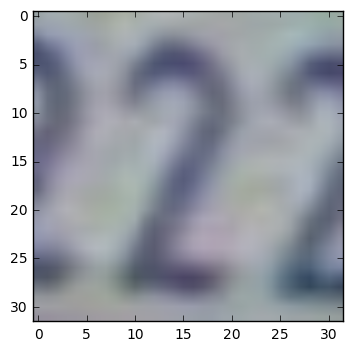

label of image:  [2]


In [25]:
def draw_img(idx):
    print('train data shape:',x_train.shape)
    plt.imshow(x_train[:,:,:,idx])
    plt.show()
    print('label of image: ', y_train[idx])
    
draw_img(7000)

In [35]:
print('Min:', min(y_train), 'Max:', max(y_train))

Min: [1] Max: [10]


In [41]:
import numpy as np

In [55]:
print(len(np.unique(y_train)))
print(np.unique(y_train))
y_train[180]

10
[ 1  2  3  4  5  6  7  8  9 10]


array([5], dtype=uint8)

In [31]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import keras

In [49]:
num_classes=11

In [50]:
# convert target values to hot enconding
# in this case we have 10 classes (1-10)
y_labels = keras.utils.to_categorical(y_train, num_classes)

In [56]:
print(len(y_labels[7]))
y_labels[180]

11


array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [73]:
# Reshape data 
X_train = x_train.reshape(x_train.shape[3], 3, 32, 32).astype('float32')
# X_train = X_train/255.0
print(X_train.shape)

(73257, 3, 32, 32)


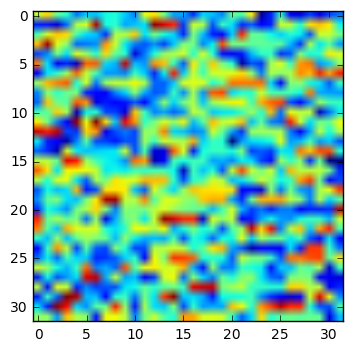

In [74]:
plt.imshow(X_train[1,0])
plt.show()

In [66]:
model = Sequential()
# Convolutional layer with 10 filter and size of 5x5
model.add(Conv2D(10, (5, 5), input_shape=(3, 32, 32), activation='relu'))

# fully connected layer
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# learn dl model
model.fit(X_train, y_labels, epochs=10, batch_size=2000, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 42s - loss: 2.2804 - acc: 0.1737 - val_loss: 2.2476 - val_acc: 0.1856
Epoch 2/10
58605/58605 [==============================] - 8s - loss: 2.2403 - acc: 0.1889 - val_loss: 2.2425 - val_acc: 0.1862
Epoch 3/10
58605/58605 [==============================] - 8s - loss: 2.2308 - acc: 0.1903 - val_loss: 2.2479 - val_acc: 0.1871
Epoch 4/10
58605/58605 [==============================] - 8s - loss: 2.2133 - acc: 0.1938 - val_loss: 2.2522 - val_acc: 0.1744
Epoch 5/10
58605/58605 [==============================] - 7s - loss: 2.1934 - acc: 0.1976 - val_loss: 2.2559 - val_acc: 0.1856
Epoch 6/10
58605/58605 [==============================] - 8s - loss: 2.1725 - acc: 0.2064 - val_loss: 2.2688 - val_acc: 0.1796
Epoch 7/10
58605/58605 [==============================] - 8s - loss: 2.1550 - acc: 0.2161 - val_loss: 2.2770 - val_acc: 0.1651
Epoch 8/10
58605/58605 [==============================] - 8s